In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']= ['SimHei']

# 读取数据

读取二手房数据

In [5]:
second_hand_houses = pd.read_csv('无锡链家二手房数据.csv')

新房数据读取

In [6]:
new_houses = pd.read_csv('无锡链家新房数据.csv')

二手房成交数据

In [7]:
transaction_records = pd.read_csv('无锡链家二手房成交记录.csv')

# 数据清洗

## 二手房数据清洗

In [8]:
second_hand_houses

,标题,小区名称,楼层,地区,户型,面积,装修,朝向,类型,房价,总价
0,广益博苑二期婚装2房 急售价格可谈看房随时有钥匙,广益博苑一期、二期,高楼层(共33层),广益,2室1厅,59.24平米,精装,南,板塔结合,"10,973元/平",65.0
1,我的天！首付12万入住城市CBD主核区！只卖给懂的人！,广南里,中楼层(共7层),江溪,2室1厅,69.71平米,精装,南,板楼,"10,759元/平",75.0
2,地铁口 商品房 三楼！业主置换 着急卖！三房户型,太湖花园一期,中楼层(共6层),江溪,2室2厅,90.57平米,精装,南,板楼,"10,821元/平",98.0
3,江大南 绿地天空树 精装修带地暖，D铁口,绿地天空树,中楼层(共33层),融创文化旅游城,3室2厅,107.71平米,精装,南,板楼,"17,176元/平",185.0
4,全明四房 视野开阔 双阳台 中间楼层,玉兰花园西三区,中楼层(共17层),海岸城/市民中心,4室2厅,152.89平米,精装,南北,板楼,"31,396元/平",480.0
...,...,...,...,...,...,...,...,...,...,...,...
2965,新安花苑三房，简装，满五唯一，包土出,新安花苑三区,低楼层(共6层),新安,3室1厅,91.88平米,简装,南,板塔结合,"11,428元/平",105.0
2966,自住精装修三房视野好房东诚心出售,融创栖溪里,低楼层(共45层),融创文化旅游城,3室2厅,118.28平米,精装,南,板楼,"17,755元/平",210.0
2967,朗诗 未来感设计 现新房 户型好 环境优美,朗诗未来街区,中楼层(共34层),临港经济开发区,3室2厅,113.84平米,毛坯,南,塔楼,"7,467元/平",85.0
2968,黄泥头好房出售，诚心卖户型方正采光好，精装,黄泥头佳苑,中楼层(共36层),广瑞/广丰,2室1厅,84平米,精装,南,板楼,"10,953元/平",92.0


In [9]:
#去除重复项
second_hand_houses.drop_duplicates(inplace=True)


In [10]:
# 检查缺失值
missing_values = second_hand_houses.isnull().sum()
missing_values

标题      0
小区名称    0
楼层      0
地区      0
户型      0
面积      0
装修      0
朝向      0
类型      0
房价      0
总价      0
dtype: int64

In [11]:
# 修改数据格式
# 移除 '元/平' 并将逗号替换为空
second_hand_houses['房价'] = second_hand_houses['房价'].str.replace('元/平', '').str.replace(',', '')
# 转换为浮点数
second_hand_houses['房价'] = second_hand_houses['房价'].astype(float)

# 移除 '平米' 并替换为空
second_hand_houses['面积'] = second_hand_houses['面积'].str.replace('平米', '')
# 转换为浮点数
second_hand_houses['面积'] = second_hand_houses['面积'].astype(float)

In [12]:
# 检查数据类型
second_hand_houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2305 entries, 0 to 2969
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   标题      2305 non-null   object 
 1   小区名称    2305 non-null   object 
 2   楼层      2305 non-null   object 
 3   地区      2305 non-null   object 
 4   户型      2305 non-null   object 
 5   面积      2305 non-null   float64
 6   装修      2305 non-null   object 
 7   朝向      2305 non-null   object 
 8   类型      2305 non-null   object 
 9   房价      2305 non-null   float64
 10  总价      2305 non-null   float64
dtypes: float64(3), object(8)
memory usage: 216.1+ KB


## 新房数据清洗

In [39]:
new_houses

,标签,地区,地址,小区,均价,房子类型,开盘时间
0,"['车位充足', '低密居所', '置换改善', '养老舒适']",锡山,无锡市锡山区锡东新城东翔路与新韵北路交会处,美的云璟,23000,NaN,0000-00-00 00:00:00
1,"['绿化率高', '人车分流', '国央企', '品牌房企']",惠山,江苏省无锡市惠山区钱洛路,云上四季,15500,非毛坯,0000-00-00 00:00:00
2,"['车位充足', '绿化率高', '自持商业', '近地铁']",锡山,锡山区丹山路145号,海尔产城创翡翠文华,19000,非毛坯,2020-04-30 10:46:58
3,"['大型社区', '品牌房企', '旅游地产', '近地铁']",新吴,锡山大道与纺城大道交叉口（九里河公园地铁站旁）,上城壹号,18000,非毛坯,2020-10-14 16:21:58
4,"['人车分流', '大型社区', '品牌房企', '贴心物业']",梁溪,江海西路888号（梁溪区江海西路与会岸路交汇处）,海伦堡·梁溪本源,18000,非毛坯,2019-12-27 09:29:43
...,...,...,...,...,...,...,...
151,"['车位充足', '人车分流', '国央企', '品牌房企']",梁溪,全丰路玖礼檀樾,玖礼檀樾,21500,非毛坯,0000-00-00 00:00:00
152,"['车位充足', '人车分流', '置换改善', '品牌房企']",梁溪,无锡梁溪区南长运河西路与建运路交叉口东南侧,十里上棠,40000,非毛坯,0000-00-00 00:00:00
153,"['车位充足', '低密居所', '国央企', '置换改善']",梁溪,梁溪区南湖大道与芦雅路交叉口西北侧,云上诗悦,26000,非毛坯,0000-00-00 00:00:00
154,"['车位充足', '人车分流', '国央企', '置换改善']",滨湖,江苏省无锡市滨湖区南湖大道和震泽路交汇处,雲湖别院,42000,非毛坯,0000-00-00 00:00:00


In [40]:
# 去除重复值
new_houses.drop_duplicates(inplace=True)

In [41]:
# 检查缺失值
miss_new_values = new_houses.isnull().sum()
miss_new_values

标签      0
地区      0
地址      0
小区      0
均价      0
房子类型    4
开盘时间    0
dtype: int64

In [42]:
# 查找缺失值位置
missing_indices = new_houses[new_houses['房子类型'].isnull()].index
print(missing_indices)

Index([0, 81, 92, 102], dtype='int64')


In [43]:
# 查看缺失值小区名称，手动填写缺失值
indices = [0, 81, 92, 102]  

for idx in indices:
    value = new_houses.loc[idx, '小区']
    print(f'Index: {idx}, Value: {value}')

Index: 0, Value: 美的云璟
Index: 81, Value: 华润置地悦景湾
Index: 92, Value: 华润置地悦景湾
Index: 102, Value: 中信泰富锦辰


In [44]:
# 有两个小区名字重复，检查重复值
print(new_houses.loc[81])
print(new_houses.loc[92])

标签      ['车位充足', '低密居所', '国央企', '置换改善']
地区                                   锡山
地址                  江苏省无锡市锡山区X205(新韵北路)
小区                              华润置地悦景湾
均价                                27850
房子类型                                NaN
开盘时间                0000-00-00 00:00:00
Name: 81, dtype: object
标签      ['车位充足', '人车分流', '国央企', '置换改善']
地区                                   锡山
地址                  江苏省无锡市锡山区X205(新韵北路)
小区                              华润置地悦景湾
均价                                29000
房子类型                                NaN
开盘时间                0000-00-00 00:00:00
Name: 92, dtype: object


In [45]:
# 修改Nan值
new_houses.loc[0, '房子类型'] = '毛坯'
new_houses.loc[81, '房子类型'] = '毛坯'
new_houses.loc[102, '房子类型'] = '非毛坯'

In [46]:
# 删除重复值
new_houses = new_houses.drop(92)

In [47]:
# 删除’小区‘中其他的重复值
new_houses.drop_duplicates(subset='小区', keep='first', inplace=True)
new_houses

,标签,地区,地址,小区,均价,房子类型,开盘时间
0,"['车位充足', '低密居所', '置换改善', '养老舒适']",锡山,无锡市锡山区锡东新城东翔路与新韵北路交会处,美的云璟,23000,毛坯,0000-00-00 00:00:00
1,"['绿化率高', '人车分流', '国央企', '品牌房企']",惠山,江苏省无锡市惠山区钱洛路,云上四季,15500,非毛坯,0000-00-00 00:00:00
2,"['车位充足', '绿化率高', '自持商业', '近地铁']",锡山,锡山区丹山路145号,海尔产城创翡翠文华,19000,非毛坯,2020-04-30 10:46:58
3,"['大型社区', '品牌房企', '旅游地产', '近地铁']",新吴,锡山大道与纺城大道交叉口（九里河公园地铁站旁）,上城壹号,18000,非毛坯,2020-10-14 16:21:58
4,"['人车分流', '大型社区', '品牌房企', '贴心物业']",梁溪,江海西路888号（梁溪区江海西路与会岸路交汇处）,海伦堡·梁溪本源,18000,非毛坯,2019-12-27 09:29:43
...,...,...,...,...,...,...,...
150,"['优惠楼盘', '车位充足', '低密居所', '国央企']",梁溪,梁溪区通江大道与锡沪路交汇处,熙悦春秋,27000,非毛坯,0000-00-00 00:00:00
151,"['车位充足', '人车分流', '国央企', '品牌房企']",梁溪,全丰路玖礼檀樾,玖礼檀樾,21500,非毛坯,0000-00-00 00:00:00
152,"['车位充足', '人车分流', '置换改善', '品牌房企']",梁溪,无锡梁溪区南长运河西路与建运路交叉口东南侧,十里上棠,40000,非毛坯,0000-00-00 00:00:00
153,"['车位充足', '低密居所', '国央企', '置换改善']",梁溪,梁溪区南湖大道与芦雅路交叉口西北侧,云上诗悦,26000,非毛坯,0000-00-00 00:00:00


In [48]:
# 将时间空值转换为’时间待定‘
def replace_invalid_date(date):
    if date == '0000-00-00 00:00:00':
        return '时间待定'
    return date

new_houses['开盘时间'] = new_houses['开盘时间'].apply(replace_invalid_date)

In [49]:
new_houses

,标签,地区,地址,小区,均价,房子类型,开盘时间
0,"['车位充足', '低密居所', '置换改善', '养老舒适']",锡山,无锡市锡山区锡东新城东翔路与新韵北路交会处,美的云璟,23000,毛坯,时间待定
1,"['绿化率高', '人车分流', '国央企', '品牌房企']",惠山,江苏省无锡市惠山区钱洛路,云上四季,15500,非毛坯,时间待定
2,"['车位充足', '绿化率高', '自持商业', '近地铁']",锡山,锡山区丹山路145号,海尔产城创翡翠文华,19000,非毛坯,2020-04-30 10:46:58
3,"['大型社区', '品牌房企', '旅游地产', '近地铁']",新吴,锡山大道与纺城大道交叉口（九里河公园地铁站旁）,上城壹号,18000,非毛坯,2020-10-14 16:21:58
4,"['人车分流', '大型社区', '品牌房企', '贴心物业']",梁溪,江海西路888号（梁溪区江海西路与会岸路交汇处）,海伦堡·梁溪本源,18000,非毛坯,2019-12-27 09:29:43
...,...,...,...,...,...,...,...
150,"['优惠楼盘', '车位充足', '低密居所', '国央企']",梁溪,梁溪区通江大道与锡沪路交汇处,熙悦春秋,27000,非毛坯,时间待定
151,"['车位充足', '人车分流', '国央企', '品牌房企']",梁溪,全丰路玖礼檀樾,玖礼檀樾,21500,非毛坯,时间待定
152,"['车位充足', '人车分流', '置换改善', '品牌房企']",梁溪,无锡梁溪区南长运河西路与建运路交叉口东南侧,十里上棠,40000,非毛坯,时间待定
153,"['车位充足', '低密居所', '国央企', '置换改善']",梁溪,梁溪区南湖大道与芦雅路交叉口西北侧,云上诗悦,26000,非毛坯,时间待定


In [50]:
# 检查数据类型
new_houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 155
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   标签      134 non-null    object
 1   地区      134 non-null    object
 2   地址      134 non-null    object
 3   小区      134 non-null    object
 4   均价      134 non-null    int64 
 5   房子类型    134 non-null    object
 6   开盘时间    134 non-null    object
dtypes: int64(1), object(6)
memory usage: 8.4+ KB


In [51]:
# 定义一个函数来添加“区”字
def add_district_suffix(district):
    return district + "区"

# 使用 apply 方法将函数应用到“地区”列
new_houses['地区'] = new_houses['地区'].apply(add_district_suffix)

new_houses

,标签,地区,地址,小区,均价,房子类型,开盘时间
0,"['车位充足', '低密居所', '置换改善', '养老舒适']",锡山区,无锡市锡山区锡东新城东翔路与新韵北路交会处,美的云璟,23000,毛坯,时间待定
1,"['绿化率高', '人车分流', '国央企', '品牌房企']",惠山区,江苏省无锡市惠山区钱洛路,云上四季,15500,非毛坯,时间待定
2,"['车位充足', '绿化率高', '自持商业', '近地铁']",锡山区,锡山区丹山路145号,海尔产城创翡翠文华,19000,非毛坯,2020-04-30 10:46:58
3,"['大型社区', '品牌房企', '旅游地产', '近地铁']",新吴区,锡山大道与纺城大道交叉口（九里河公园地铁站旁）,上城壹号,18000,非毛坯,2020-10-14 16:21:58
4,"['人车分流', '大型社区', '品牌房企', '贴心物业']",梁溪区,江海西路888号（梁溪区江海西路与会岸路交汇处）,海伦堡·梁溪本源,18000,非毛坯,2019-12-27 09:29:43
...,...,...,...,...,...,...,...
150,"['优惠楼盘', '车位充足', '低密居所', '国央企']",梁溪区,梁溪区通江大道与锡沪路交汇处,熙悦春秋,27000,非毛坯,时间待定
151,"['车位充足', '人车分流', '国央企', '品牌房企']",梁溪区,全丰路玖礼檀樾,玖礼檀樾,21500,非毛坯,时间待定
152,"['车位充足', '人车分流', '置换改善', '品牌房企']",梁溪区,无锡梁溪区南长运河西路与建运路交叉口东南侧,十里上棠,40000,非毛坯,时间待定
153,"['车位充足', '低密居所', '国央企', '置换改善']",梁溪区,梁溪区南湖大道与芦雅路交叉口西北侧,云上诗悦,26000,非毛坯,时间待定


## 二手房成交数据清洗

In [74]:
transaction_records

,小区名称,户型,面积（平米）,装修,朝向,出售时间,单价（元/平米）,总价（万）,挂牌价（万）,成交周期（天）
0,锦隆一村,2室1厅,71.45,简装,南,2024.06.21,8425,60.2,66.8,95
1,惠景家园,2室2厅,75.68,精装,南 北,2024.06.21,11879,89.9,92.0,42
2,蓝光coco蜜园,3室2厅,76.81,精装,南,2024.06.21,13996,107.5,119.0,122
3,兴竹家园,2室1厅,73.97,精装,南,2024.06.21,10799,79.9,56.0,44
4,万业观山泓郡,3室2厅,84.26,精装,南,2024.06.21,14824,124.9,138.0,41
...,...,...,...,...,...,...,...,...,...,...
2995,俊发SOHO俊园,2室1厅,40.59,毛坯,南,2024.03.23,9338,37.9,41.0,18
2996,新洲人家,3室2厅,134.07,精装,南,2024.03.23,8041,107.8,113.0,18
2997,芦庄五区,2室1厅,65.10,精装,南,2024.03.23,11521,75.0,79.0,363
2998,华夏世纪锦园北区,3室2厅,101.00,精装,南,2024.03.23,11486,116.0,121.0,170


In [75]:
# 去除重复值
transaction_records.drop_duplicates(inplace=True)

In [76]:
# 检查缺失值
miss_translation_data = transaction_records.isnull().sum()
miss_translation_data

小区名称        0
户型          0
面积（平米）      0
装修          0
朝向          0
出售时间        0
单价（元/平米）    0
总价（万）       0
挂牌价（万）      0
成交周期（天）     0
dtype: int64

In [77]:
# 检查数据类型
transaction_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   小区名称      3000 non-null   object 
 1   户型        3000 non-null   object 
 2   面积（平米）    3000 non-null   float64
 3   装修        3000 non-null   object 
 4   朝向        3000 non-null   object 
 5   出售时间      3000 non-null   object 
 6   单价（元/平米）  3000 non-null   int64  
 7   总价（万）     3000 non-null   float64
 8   挂牌价（万）    3000 non-null   float64
 9   成交周期（天）   3000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 234.5+ KB


# 市场分析

## 新房和二手房市场对比

In [16]:
# 将二手房地区改为行政区
# 创建一个字典，将地区名称映射到行政区
district_mapping = {
    '广益': '梁溪区',
    '江溪': '新吴区',
    '融创文化旅游城': '滨湖区',
    '海岸城/市民中心': '滨湖区',
    '长广溪/大学城': '滨湖区',
    '海岸城/市民中心': '滨湖区',
    '河埒口': '滨湖区',
    '华庄': '滨湖区',
    '胡埭': '滨湖区',
    '蠡湖新城': '滨湖区',
    '马山梅园': '滨湖区',
    '南泉': '滨湖区',
    '融创文化旅游城': '滨湖区',
    '荣巷': '滨湖区',
    '太湖山水城': '滨湖区',
    '新体育中心': '滨湖区',
    '坊前': '滨湖区',
    '塘铁桥': '滨湖区',
    '万象城/东绛': '滨湖区',
    '湖滨商业街': '滨湖区',
    '中桥': '滨湖区',
    '梅园': '滨湖区',
    '北大街': '梁溪区',
    '广瑞/广丰': '梁溪区',
    '广益': '梁溪区',
    '黄巷': '梁溪区',
    '刘潭': '梁溪区',
    '民丰/庄前': '梁溪区',
    '清名桥': '梁溪区',
    '三阳广场': '梁溪区',
    '山北': '梁溪区',
    '五爱广场': '梁溪区',
    '迎龙桥': '梁溪区',
    '扬名': '梁溪区',
    '上马墩': '梁溪区',
    '塘南': '梁溪区',
    '鸿山': '新吴区',
    '江溪': '新吴区',
    '梅村': '新吴区',
    '生态园': '新吴区',
    '高新区': '新吴区',
    '硕放': '新吴区',
    '旺庄': '新吴区',
    '新安': '新吴区',
    '洛社': '惠山区',
    '前洲': '惠山区',
    '石塘湾': '惠山区',
    '西漳': '惠山区',
    '阳山': '惠山区',
    '堰桥': '惠山区',
    '玉祁': '惠山区',
    '钱桥': '惠山区',
    '安镇': '锡山区',
    '东北塘': '锡山区',
    '东港': '锡山区',
    '鹅湖': '锡山区',
    '锡北': '锡山区',
    '羊尖': '锡山区',
    '东亭': '锡山区',
    '澄江街道': '江阴市',
    '云亭街道': '江阴市',
    '徐霞客镇':'江阴市',
    '临港经济开发区':'江阴市'
}

# 使用循环遍历数据框并更新 '地区' 列
for index, row in second_hand_houses.iterrows():
    if row['地区'] in district_mapping:
        second_hand_houses.at[index, '地区'] = district_mapping[row['地区']]

# 显示更新后的数据
second_hand_houses

,标题,小区名称,楼层,地区,户型,面积,装修,朝向,类型,房价,总价
0,广益博苑二期婚装2房 急售价格可谈看房随时有钥匙,广益博苑一期、二期,高楼层(共33层),梁溪区,2室1厅,59.24,精装,南,板塔结合,10973.0,65.0
1,我的天！首付12万入住城市CBD主核区！只卖给懂的人！,广南里,中楼层(共7层),新吴区,2室1厅,69.71,精装,南,板楼,10759.0,75.0
2,地铁口 商品房 三楼！业主置换 着急卖！三房户型,太湖花园一期,中楼层(共6层),新吴区,2室2厅,90.57,精装,南,板楼,10821.0,98.0
3,江大南 绿地天空树 精装修带地暖，D铁口,绿地天空树,中楼层(共33层),滨湖区,3室2厅,107.71,精装,南,板楼,17176.0,185.0
4,全明四房 视野开阔 双阳台 中间楼层,玉兰花园西三区,中楼层(共17层),滨湖区,4室2厅,152.89,精装,南北,板楼,31396.0,480.0
...,...,...,...,...,...,...,...,...,...,...,...
2965,新安花苑三房，简装，满五唯一，包土出,新安花苑三区,低楼层(共6层),新吴区,3室1厅,91.88,简装,南,板塔结合,11428.0,105.0
2966,自住精装修三房视野好房东诚心出售,融创栖溪里,低楼层(共45层),滨湖区,3室2厅,118.28,精装,南,板楼,17755.0,210.0
2967,朗诗 未来感设计 现新房 户型好 环境优美,朗诗未来街区,中楼层(共34层),江阴市,3室2厅,113.84,毛坯,南,塔楼,7467.0,85.0
2968,黄泥头好房出售，诚心卖户型方正采光好，精装,黄泥头佳苑,中楼层(共36层),梁溪区,2室1厅,84.00,精装,南,板楼,10953.0,92.0


In [17]:
# 不同地区房价分析
region_price_analysis = second_hand_houses.groupby('地区')['房价'].mean().sort_values(ascending=False)
print("不同地区的平均房价：\n", region_price_analysis)

# 不同地区房价分析
region_price_analysis = new_houses.groupby('地区')['均价'].mean().sort_values(ascending=False)
print("不同地区的平均房价：\n", region_price_analysis)

不同地区的平均房价：
 地区
滨湖区    18177.599711
梁溪区    15405.037549
锡山区    14069.358289
新吴区    13659.873171
惠山区    13101.018939
江阴市    10753.016949
Name: 房价, dtype: float64
不同地区的平均房价：
 地区
滨湖     28428.571429
梁溪     27909.090909
新吴     20656.250000
锡山     20635.714286
宜兴市    20250.000000
惠山     19005.000000
江阴市    14542.307692
Name: 均价, dtype: float64


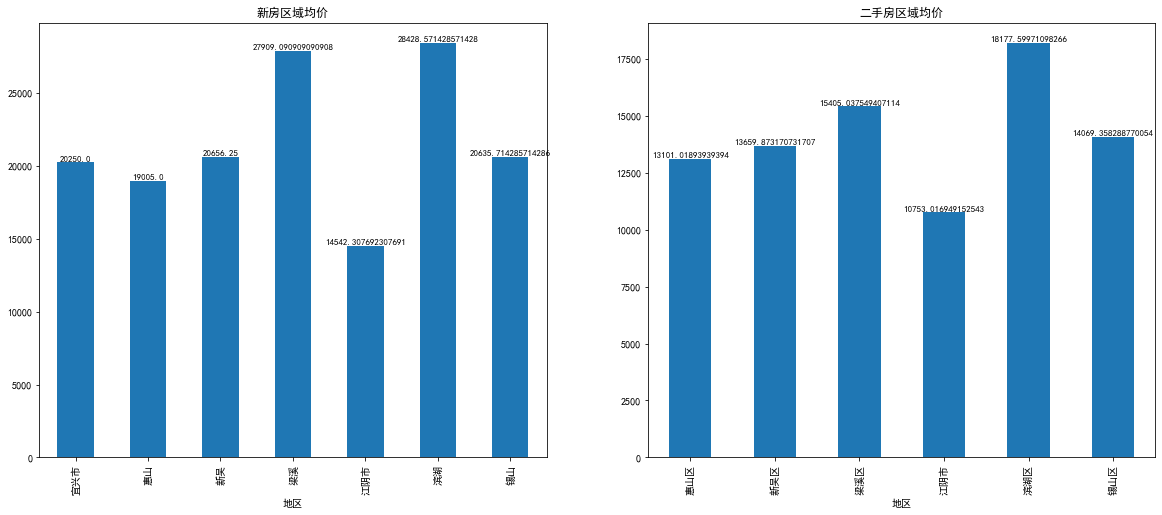

In [18]:
# 计算新房和二手房的区域均价
new_houses_avg_price = new_houses.groupby('地区')['均价'].mean()
second_hand_houses_avg_price = second_hand_houses.groupby('地区')['房价'].mean()

# 可视化
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
new_houses_avg_price.plot(kind='bar', title='新房区域均价')
for i, v in enumerate(new_houses_avg_price):
    plt.text(i, v + 3, str(v), ha='center', va='bottom', fontsize=9)

plt.subplot(1, 2, 2)
second_hand_houses_avg_price.plot(kind='bar', title='二手房区域均价')
for i, v in enumerate(second_hand_houses_avg_price):
    plt.text(i, v + 3, str(v), ha='center', va='bottom', fontsize=9)

plt.show()

### 数据表

| 地区     | 二手房平均房价 (元/平方米) | 新房平均房价 (元/平方米) | 差异 (元/平方米) | 差异百分比 (%) |
|----------|----------------------------|--------------------------|------------------|----------------|
| 滨湖区   | 18177.60                   | 28210.53                 | 10032.93         | 55.18%         |
| 梁溪区   | 15405.04                   | 27190.48                 | 11785.44         | 76.51%         |
| 锡山区   | 14069.36                   | 19965.79                 | 5896.43          | 41.91%         |
| 新吴区   | 13659.87                   | 19230.77                 | 5570.90          | 40.77%         |
| 惠山区   | 13101.02                   | 18711.76                 | 5610.74          | 42.82%         |
| 江阴市   | 10753.02                   | 14295.83                 | 3542.81          | 32.94%         |
| 宜兴市 | -                          | 20250.00                 | -                | -              |

### 总结

- **总体趋势**：所有地区的新房价格均高于二手房价格，差异从3542.81元到11785.44元不等。
- **差异最大**：梁溪区，新房价格比二手房高出约11785.44元，差异百分比为76.51%。
- **差异最小**：江阴市，新房价格比二手房高出约3542.81元，差异百分比为32.94%。
- **价格较高的区域**：滨湖区和梁溪区的新房和二手房价格都明显高于其他地区。
- **价格较低的区域**：江阴市的二手房和新房价格相对较低，且差异较小。


## 房源选择

户型均价数据：
户型
4室2厅    18182.673077
5室3厅    17250.333333
5室2厅    16991.411765
3室1厅    16225.233333
3室2厅    16144.698305
1室0厅    15692.000000
4室3厅    14544.000000
4室1厅    14472.619048
2室2厅    14442.943601
2室1厅    13803.294118
3室3厅    13638.000000
1室1厅    13510.005780
1室2厅    12698.500000
6室2厅    10071.000000
7室2厅     8458.000000
Name: 房价, dtype: float64
装修均价数据：
装修
精装    15961.803560
毛坯    14810.494048
其他    14398.062500
简装    13552.022936
Name: 房价, dtype: float64


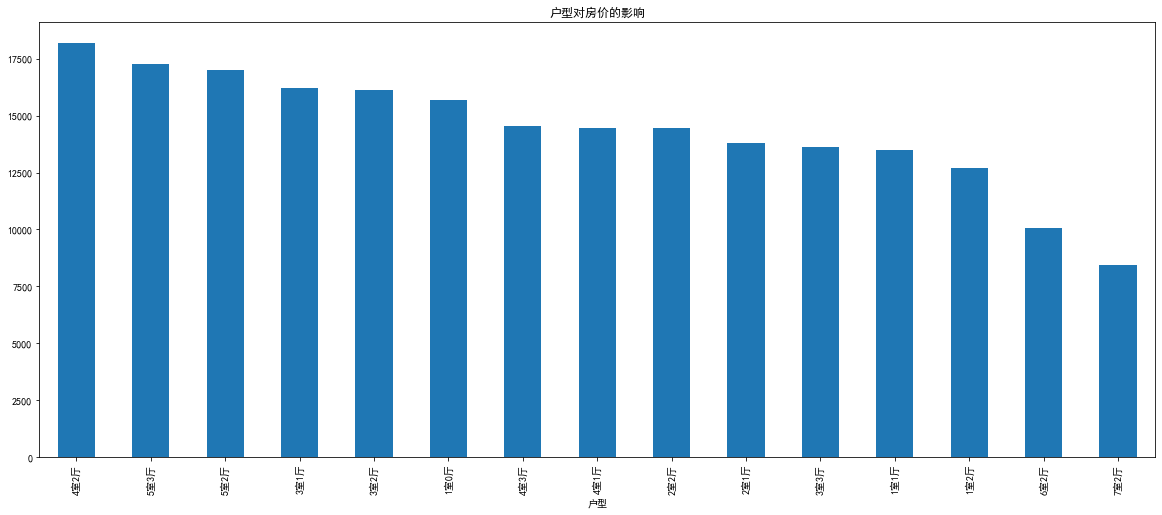

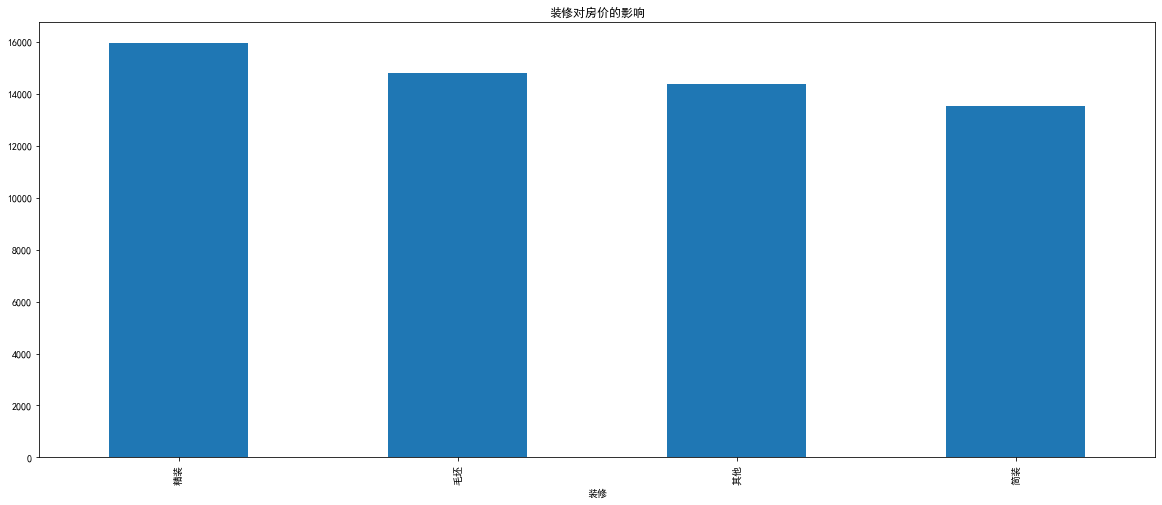

In [82]:
# 计算户型的均价
house_type_price = second_hand_houses.groupby('户型')['房价'].mean().sort_values(ascending=False)
print("户型均价数据：")
print(house_type_price)

# 计算装修的均价
decoration_price = second_hand_houses.groupby('装修')['房价'].mean().sort_values(ascending=False)
print("装修均价数据：")
print(decoration_price)

# 户型对房价的影响
plt.figure(figsize=(20, 8))
house_type_price = second_hand_houses.groupby('户型')['房价'].mean().sort_values(ascending=False)
house_type_price.plot(kind='bar', title='户型对房价的影响')
plt.show()

# 装修对房价的影响
plt.figure(figsize=(20, 8))
decoration_price = second_hand_houses.groupby('装修')['房价'].mean().sort_values(ascending=False)
decoration_price.plot(kind='bar', title='装修对房价的影响')
plt.show()


### 户型对房价的影响分析

1. **高价位户型**：最高均价的户型是“4室2厅”，其次是“5室3厅”和“5室2厅”。这表明更大的户型（更多的卧室和客厅）通常有更高的均价，这可能与它们的空间更大、适合大家庭居住或有更好的居住功能性有关。

2. **中等价位户型**：中等价位的户型包括“3室1厅”和“3室2厅”，这些户型是市场上常见的家庭型户型，适合中等家庭，价格相对适中。

3. **低价位户型**：最低均价的户型是“7室2厅”，其次是“6室2厅”，这可能表明市场对这种大户型的需求较少，或者这些数据中的样本位于价格较低的地区。

4. **小户型**：“1室0厅”和“1室1厅”这类小户型的均价也相对较高，可能因为它们在市中心或高价地区的小型公寓中较为常见，适合单身或小家庭居住。

### 装修对房价的影响分析

1. **高价位装修**：“精装”修饰的房产有最高的均价，这可能是因为精装修房屋无需额外装修，即可入住，适合买家寻求即买即住的便利。

2. **次高价位装修**：“毛坯”房屋的均价位居次席，这可能与买家对于自定义装修的偏好有关。毛坯房允许买家根据自己的喜好来装修房屋，这可能会吸引一部分买家，尽管它们需要额外的装修成本。

3. **其他装修状态**：“其他”可能指的是部分装修或者装修程度不明确的房屋，其均价略低于毛坯。

4. **低价位装修**：“简装”房屋的均价最低，这可能表明简装房屋的装修质量较低，或者买家可能需要进行进一步的装修投入。

### 综合分析

从数据中可以看出，房屋的户型和装修状态对房价有明显的影响。较大的户型和精装修状态的房屋通常有更高的均价，而较小或特别大的户型（如“7室2厅”和“6室2厅”）以及简装修的房屋则有更低的均价。

## 二手房定价策略

In [91]:
# 计算平均溢价率
transaction_records['溢价率'] = (transaction_records['总价（万）'] - transaction_records['挂牌价（万）']) / transaction_records['挂牌价（万）']
avg_premium = transaction_records.groupby('小区名称')['溢价率'].mean().sort_values(ascending=False)

print("平均溢价率最高的小区：")
print(avg_premium.head())

平均溢价率最高的小区：
小区名称
周新苑四期     0.388889
仙河苑二期     0.350000
新安花苑二区    0.327273
丰裕园二期     0.280488
蓉阳苑       0.267442
Name: 溢价率, dtype: float64


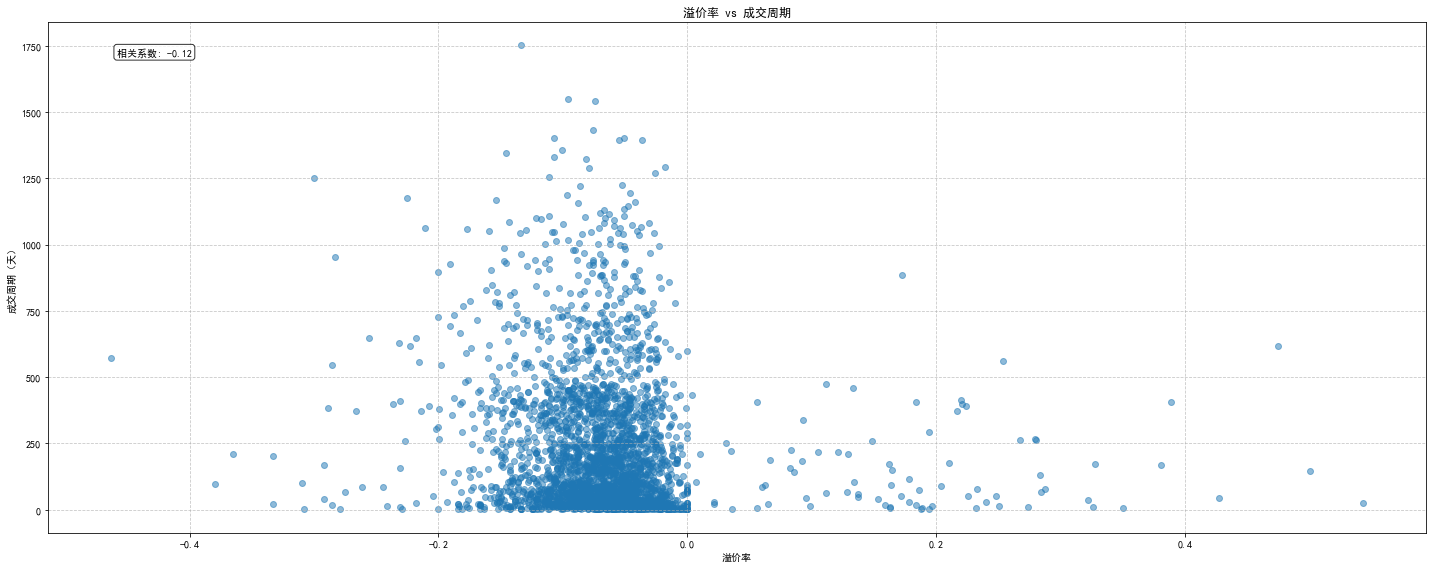

溢价率平均值: -0.07
成交周期平均值: 224.49 天


In [108]:
correlation = transaction_records['溢价率'].corr(transaction_records['成交周期（天）'])

# 创建图表
plt.figure(figsize=(20, 8))

# 绘制散点图
plt.scatter(transaction_records['溢价率'], transaction_records['成交周期（天）'], alpha=0.5)

# 设置标签和标题
plt.xlabel('溢价率')
plt.ylabel('成交周期（天）')
plt.title('溢价率 vs 成交周期')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 添加相关系数信息
plt.text(0.05, 0.95, f'相关系数: {correlation:.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 支持负号显示
plt.rcParams['axes.unicode_minus'] = False

# 显示图表
plt.tight_layout()
plt.show()

# 打印一些基本统计信息
print(f"溢价率平均值: {transaction_records['溢价率'].mean():.2f}")
print(f"成交周期平均值: {transaction_records['成交周期（天）'].mean():.2f} 天")

In [106]:
# 计算最佳定价区间
def optimal_price_range(group):
    return pd.Series({
        '最佳定价下限': group['总价（万）'].quantile(0.25),
        '最佳定价上限': group['总价（万）'].quantile(0.75),
        '平均成交价': group['总价（万）'].mean(),
        '平均成交周期': group['成交周期（天）'].mean()
    })

optimal_prices = transaction_records.groupby('小区名称').apply(optimal_price_range)
print("各小区的最佳定价区间：")
print(optimal_prices)


各小区的最佳定价区间：
           最佳定价下限   最佳定价上限   平均成交价      平均成交周期
小区名称                                          
ΜΟΜΛ春风湖上  371.000  371.000  371.00    2.000000
一品城       850.000  850.000  850.00  169.000000
一方城        86.000   86.000   86.00  350.000000
万业观山泓郡    127.225  151.425  159.30  281.250000
万商美寓       26.000   26.000   26.00   62.000000
...           ...      ...     ...         ...
龙湖九里香醍北区  136.150  141.250  139.10  270.666667
龙湖九里香醍南区  604.500  629.500  613.00  150.333333
龙湖天宸原著    162.200  189.800  203.00  314.800000
龙湖天鉅      202.600  324.200  263.40  275.000000
龙韵怡景苑      98.275  103.825  101.05  149.000000

[978 rows x 4 columns]


<ipython-input-106-91d74f1ef8f2>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  optimal_prices = transaction_records.groupby('小区名称').apply(optimal_price_range)


### 溢价率
平均溢价率为-0.07，即-7%。这表明平均而言，房产的实际成交价格比挂牌价格低7%。这可能反映了以下情况：
1. 卖方可能倾向于略高定价，为议价留出空间。
2. 买方通常能够成功议价，获得低于挂牌价的成交价。
3. 市场可能处于买方市场，供大于求，导致价格有下行压力。
### 成交周期
平均成交周期约为224.49天，即大约7.5个月。这个周期相对较长，可能说明：
1. 市场可能不够活跃，导致成交速度较慢。
### 最佳定价区间
1. 更准确的定价策略：
卖家可以根据最佳定价区间来设定更合理的挂牌价格，既不会定价过高导致房产滞销，也不会定价过低造成不必要的损失。
这有助于缩短成交周期，提高交易效率。

2. 提高成交概率：
在最佳定价区间内定价可以吸引更多潜在买家，因为价格符合市场预期。
增加了房产在合理时间内成交的可能性。

3. 市场透明度：
提高整体市场的透明度，有助于形成更健康、更稳定的房地产市场。
减少信息不对称导致的市场扭曲。

## 二手房销售技巧分析

In [129]:
# 分析成交周期短的案例
quick_sales = transaction_records[transaction_records['成交周期（天）'] < 7]  # 假设7天内成交为快速成交
print("快速成交案例：")
print(quick_sales[['小区名称', '户型', '总价（万）', '成交周期（天）']])


快速成交案例：
            小区名称    户型  总价（万）  成交周期（天）
7           星海新村  2室1厅   73.6        1
43        茂业时代广场  1室1厅   33.8        2
51        天渝骏园二期  3室2厅  155.0        4
54    阿卡迪亚（天骄铭邸）  2室2厅  108.5        6
106        马鞍苑一区  2室2厅   73.8        1
...          ...   ...    ...      ...
2886        东河头巷  2室1厅  163.8        4
2907        惠钱二村  1室1厅   59.9        5
2908      茂业时代广场  1室1厅   32.0        4
2934        紫金花园  3室1厅  106.0        2
2990     华润江南府北区  3室2厅  207.0        2

[184 rows x 4 columns]


户型统计表：
      数量   均价（万）
户型              
3室2厅  65  156.85
2室1厅  34   88.69
1室1厅  24   45.61
3室1厅  24  142.50
2室2厅  17   88.06
4室2厅  13  291.77
4室1厅   4  242.25
1室0厅   1   22.40
4室3厅   1  475.00
6室2厅   1  371.00


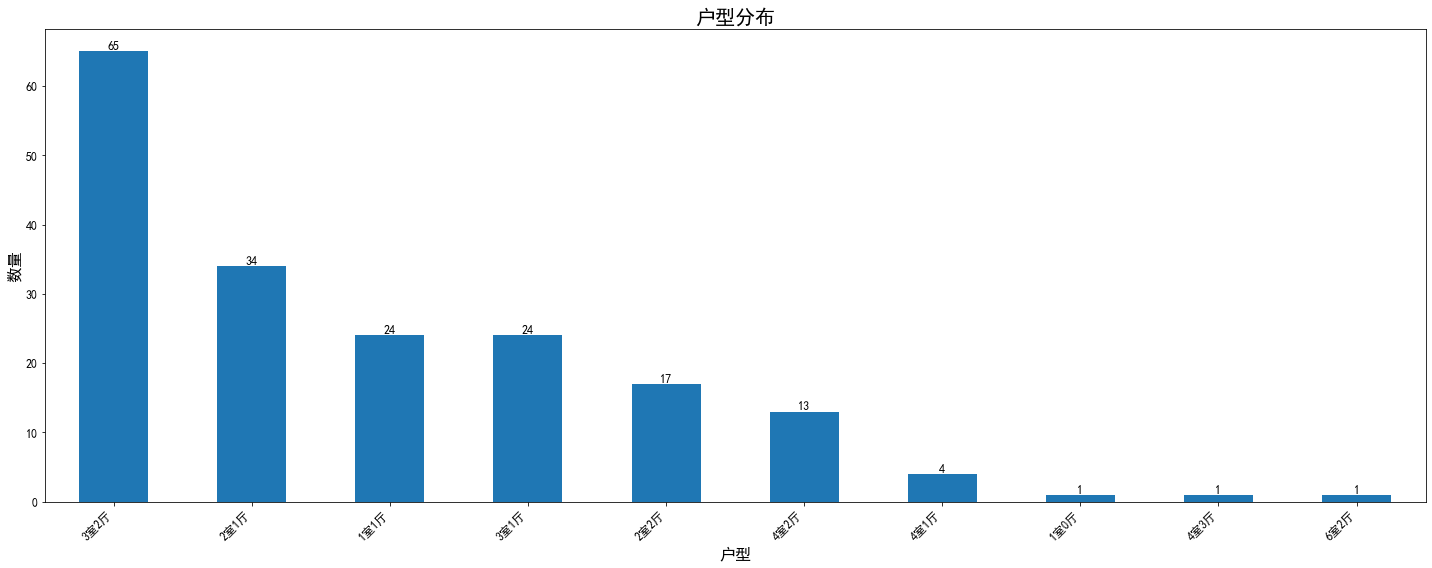

In [143]:
# 计算户型的数量
house_type_count = quick_sales['户型'].value_counts().sort_values(ascending=False)

# 计算户型的均价
house_type_price = quick_sales.groupby('户型')['总价（万）'].mean().sort_values(ascending=False)

# 创建一个新的DataFrame，包含户型数量和均价
house_type_stats = pd.DataFrame({
    '数量': house_type_count,
    '均价（万）': house_type_price
}).sort_values('数量', ascending=False)

# 格式化均价为两位小数
house_type_stats['均价（万）'] = house_type_stats['均价（万）'].round(2)

print("户型统计表：")
print(house_type_stats)

# 户型分布图
plt.figure(figsize=(20, 8))
house_type_stats['数量'].plot(kind='bar')
plt.title('户型分布', fontsize=20)
plt.xlabel('户型', fontsize=16)
plt.ylabel('数量', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 在柱状图上添加具体数值
for i, v in enumerate(house_type_stats['数量']):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### 总结
1. 市场主导户型:
3室2厅占据了市场的35.33%,是绝对主导的户型,均价156.85万。这表明超过三分之一的市场需求集中在这种适合中等家庭的户型上。
2. 小户型市场:
2室1厅(18.48%)和1室1厅(13.04%)共占市场的31.52%,构成了重要的小户型市场。
这两种户型的均价分别为88.69万和45.61万,可能更受年轻人、单身人士或投资者青睐。
3. 中等户型:
3室1厅占13.04%,均价142.50万,是3室2厅的经济型替代选择。
2室2厅占9.24%,均价88.06万,与2室1厅价格相近,但占比较小。
4. 大户型市场:
4室2厅虽然只占7.07%,但均价高达291.77万,可能针对高收入家庭。
4室以上的户型(4室1厅、4室3厅、6室2厅)共占约3.25%,均价较高,属于高端市场。

## 客户定位

### 分析不同价格区间的房源数量

<ipython-input-156-342a4ecdddca>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_distribution = second_hand_houses.groupby(price_ranges).size()


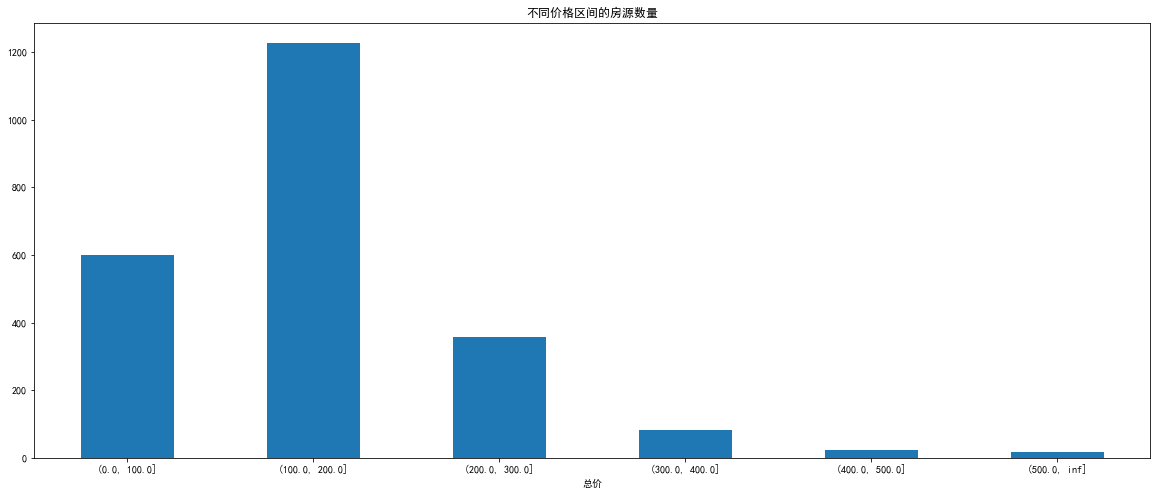

In [156]:
plt.figure(figsize=(20, 8))
price_ranges = pd.cut(second_hand_houses['总价'], bins=[0, 100, 200, 300, 400, 500, np.inf])
price_distribution = second_hand_houses.groupby(price_ranges).size()
price_distribution.plot(kind='bar')
plt.title('不同价格区间的房源数量')

# 修改x轴标签为横向显示
plt.xticks(rotation=0)

plt.show()

### 户型偏好分析

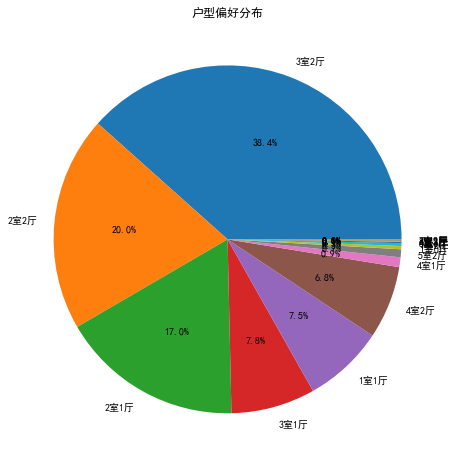

In [160]:
def room_type_analysis(df, room_column):
    room_distribution = df[room_column].value_counts()
    
    plt.figure(figsize=(20,8))
    room_distribution.plot(kind='pie', autopct='%1.1f%%')
    plt.title('户型偏好分布')
    plt.ylabel('')
    plt.show()
    
    return room_distribution

room_dist = room_type_analysis(second_hand_houses, '户型')


### 面积需求分析

<ipython-input-163-b8d389affb0c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_distribution = df.groupby(area_ranges).size()


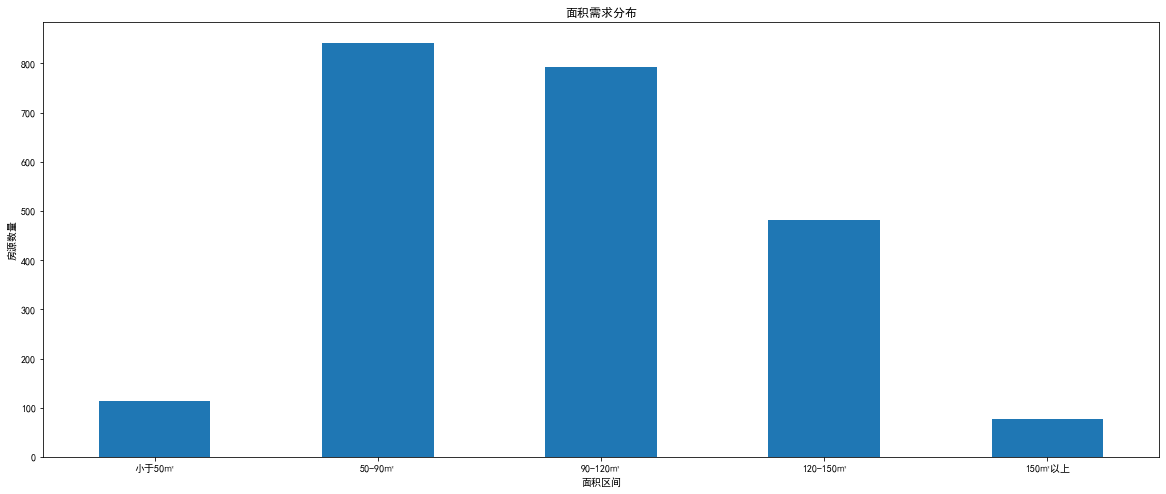

In [163]:
def area_analysis(df, area_column):
    area_ranges = pd.cut(df[area_column], bins=[0, 50, 90, 120, 150, np.inf], 
                         labels=['小于50㎡', '50-90㎡', '90-120㎡', '120-150㎡', '150㎡以上'])
    area_distribution = df.groupby(area_ranges).size()
    
    plt.figure(figsize=(20,8))
    area_distribution.plot(kind='bar')
    plt.title('面积需求分布')
    plt.xlabel('面积区间')
    plt.ylabel('房源数量')
    # 修改x轴标签为横向显示
    plt.xticks(rotation=0)
    plt.show()
    
    return area_distribution

area_dist = area_analysis(second_hand_houses, '面积')

### 装修偏好分析

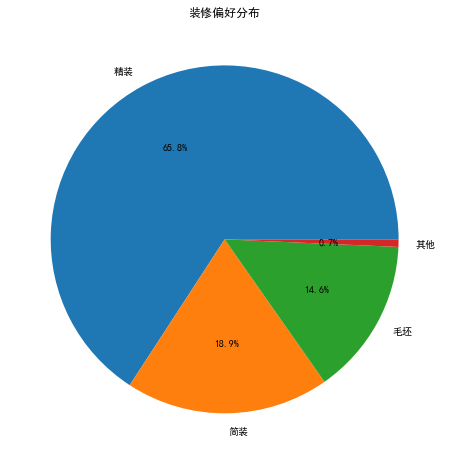

In [13]:
def decoration_analysis(df, decoration_column):
    decoration_distribution = df[decoration_column].value_counts()
    
    plt.figure(figsize=(20,8))
    decoration_distribution.plot(kind='pie', autopct='%1.1f%%')
    plt.title('装修偏好分布')
    plt.ylabel('')
    plt.show()
    
    return decoration_distribution
decoration_dist = decoration_analysis(second_hand_houses, '装修')

### 区域偏好分析

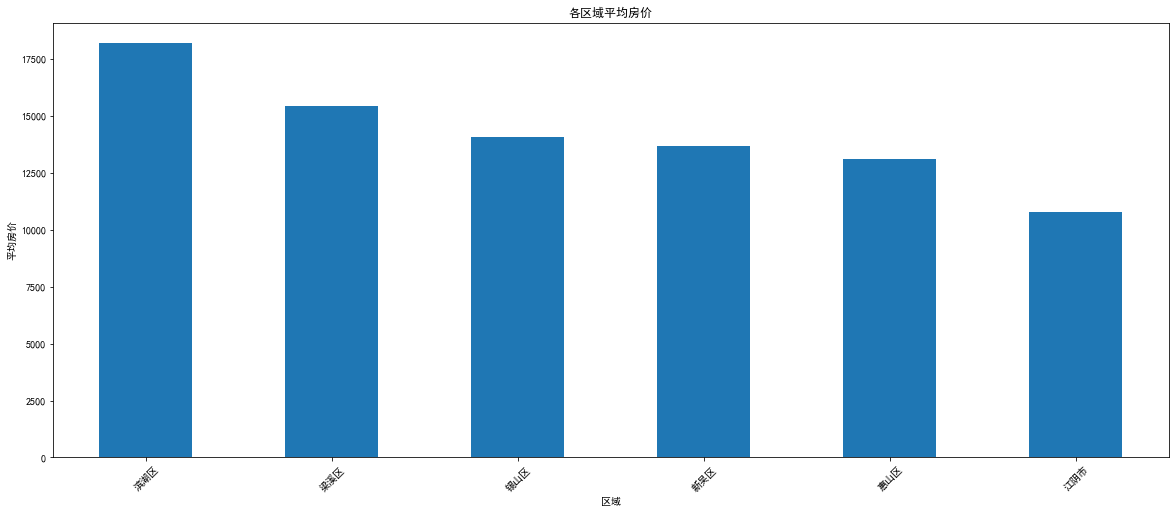

In [172]:
def district_analysis(df, district_column, value_column):
    district_avg_price = df.groupby(district_column)[value_column].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(20,8))
    district_avg_price.plot(kind='bar')
    plt.title('各区域平均房价')
    plt.xlabel('区域')
    plt.ylabel('平均房价')
    plt.xticks(rotation=45)
    plt.show()
    
    return district_avg_price

district_price = district_analysis(second_hand_houses, '地区', '房价')

### 多维度交叉分析

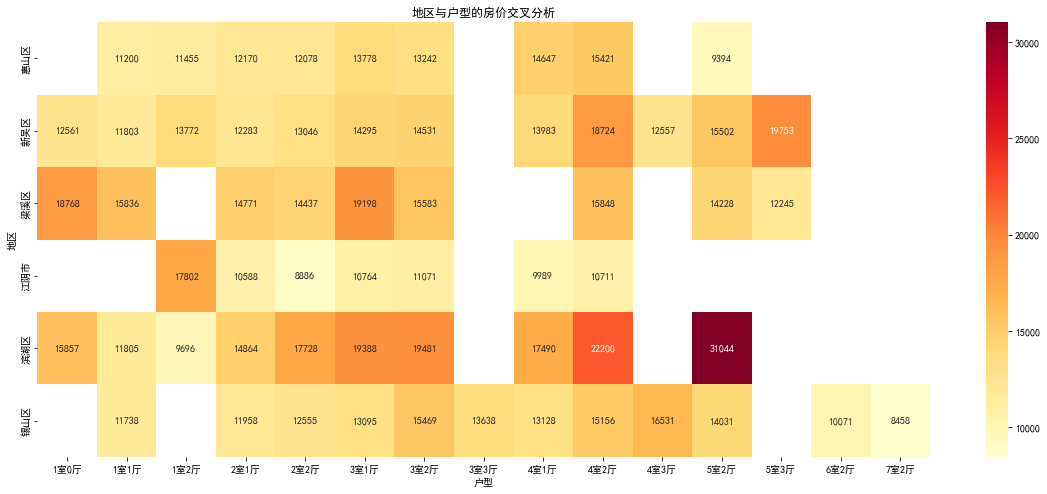

In [19]:
def cross_analysis(df, x_column, y_column, value_column):
    pivot = df.pivot_table(values=value_column, index=x_column, columns=y_column, aggfunc='mean')
    
    plt.figure(figsize=(20,8))
    sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd')
    plt.title(f'{x_column}与{y_column}的{value_column}交叉分析')
    plt.show()
    
    return pivot

area_district_price = cross_analysis(second_hand_houses, '地区', '户型', '房价')

### 客户画像总结

In [177]:
def customer_profile_summary(price_dist, room_dist, area_dist, decoration_dist, district_price):
    print("客户画像总结：")
    print(f"1. 最受欢迎的价格区间: {price_dist.idxmax()}")
    print(f"2. 最受欢迎的户型: {room_dist.idxmax()}")
    print(f"3. 最受欢迎的面积区间: {area_dist.idxmax()}")
    print(f"4. 最受欢迎的装修类型: {decoration_dist.idxmax()}")
    print(f"5. 平均房价最高的区域: {district_price.idxmax()}")
    
customer_profile_summary(second_hand_dist, room_dist, area_dist, decoration_dist, district_price)

客户画像总结：
1. 最受欢迎的价格区间: 100-200万
2. 最受欢迎的户型: 3室2厅
3. 最受欢迎的面积区间: 50-90㎡
4. 最受欢迎的装修类型: 精装
5. 平均房价最高的区域: 滨湖区


# 总结

In [14]:
report = """
1. 市场需求概况：
最受欢迎的价格区间：100-200万
最受欢迎的户型：3室2厅（占市场35.33%）
最受欢迎的面积区间：50-90㎡
最受欢迎的装修类型：精装
平均房价最高的区域：滨湖区

2. 户型分布：
主导户型：3室2厅（35.33%，均价156.85万）
小户型市场：2室1厅和1室1厅（合计31.52%）
中等户型：3室1厅（13.04%）和2室2厅（9.24%）
大户型市场：4室2厅及以上（约10.32%）

3. 市场特征：
平均溢价率：-7%（实际成交价低于挂牌价）
平均成交周期：约224.49天（7.5个月）
市场状态：可能为买方市场，供大于求

4. 价格影响因素：
户型：大户型通常价格较高，但特大户型可能需求较少
装修：精装房均价最高，其次是毛坯房，简装房最低

5. 新房与二手房比较：
所有地区新房价格均高于二手房
差异最大：梁溪区（76.51%）
差异最小：江阴市（32.94%）
高价区域：滨湖区和梁溪区
低价区域：江阴市

6. 市场建议：
卖家：根据最佳定价区间设定合理价格，提高成交效率
买家：关注3室2厅等主流户型，考虑精装房的便利性
投资者：可关注小户型市场，如2室1厅和1室1厅
"""
